### Desafío 1. Determinantes del ingreso

<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


## Hito 1

### Preliminares
#### Descripción del problema y objetivos
* Se desea obtener la probabilidad que un individuo presente salarios por sobre los 50.000 dólares anuales en base a una serie de atributos sociodemográficos.
* El tipo de problema a resolver es de clasificación.
* El objetivo de este trabajo es desarrollar un modelo predictivo para obtener la probabilidad que un individuo presente salarios por sobre los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

#### Descripción de la solución
* Se realizará un análisis descriptivo sobre las diferentes variables sociodemográficas.
* Se eliminarán valores nulos.
* Se recodificarán las variables de acuerdo a lo indicado en "Aspectos adicionales a considerar".
* Se estandarizaran las variables que correspondan.
* Se construirá un modelo de regresión logística que considere a todas las variables sociodemográficas. El modelo será entrenado con un 67% de los datos y validado con el 33% de estos.
* El modelo será optimizado considerando las variables que sean más significativas para explicar la variabilidad del resultado, con un p-value <= 0.025
* El modelo será evaluado de acuerdo a las métricas de precision, recall y f1. Además se hará uso de la curva ROC para complementar la evaluación del modelo.
* En base a la evaluación anterior se establecerán las conclusiones.

### Aspectos computacionales
#### Descripción de librerías y módulos
Se usarán las siguientes librerías y módulos por cada etapa de la construcción del modelo:
* ingesta: pandas
* preprocesamiento: pandas, numpy, StandardScaler desde sklearn.preprocessing
* visualización: matplotlib, seaborn, missingno
* modelación: LogisticRegression desde sklearn.linear_model, train_test_split desde sklearn.model_selection
* métricas de evaluación: classification_report y roc_curve desde sklearn.metrics

## Hito 2

### Descripción
* Inspección visual del vector objetivo
* Inspección visual de las variables
* Inspección de datos perdidos
* Preprocesamiento y recodificación de las variables

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msngo

df = pd.read_csv('income-db.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
# Inspección visual del vector objetivo
df['income'].value_counts('%')

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [27]:
# Inspección visual de las variables
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
# Inspección visual de las variables
for var in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    print(var)
    print(df[var].value_counts('%'))

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Na

In [29]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


age 0.0
workclass 0.057
fnlwgt 0.0
education 0.0
educational-num 0.0
marital-status 0.0
occupation 0.058
relationship 0.0
race 0.0
gender 0.0
capital-gain 0.0
capital-loss 0.0
hours-per-week 0.0
native-country 0.018
income 0.0


<Figure size 288x288 with 0 Axes>

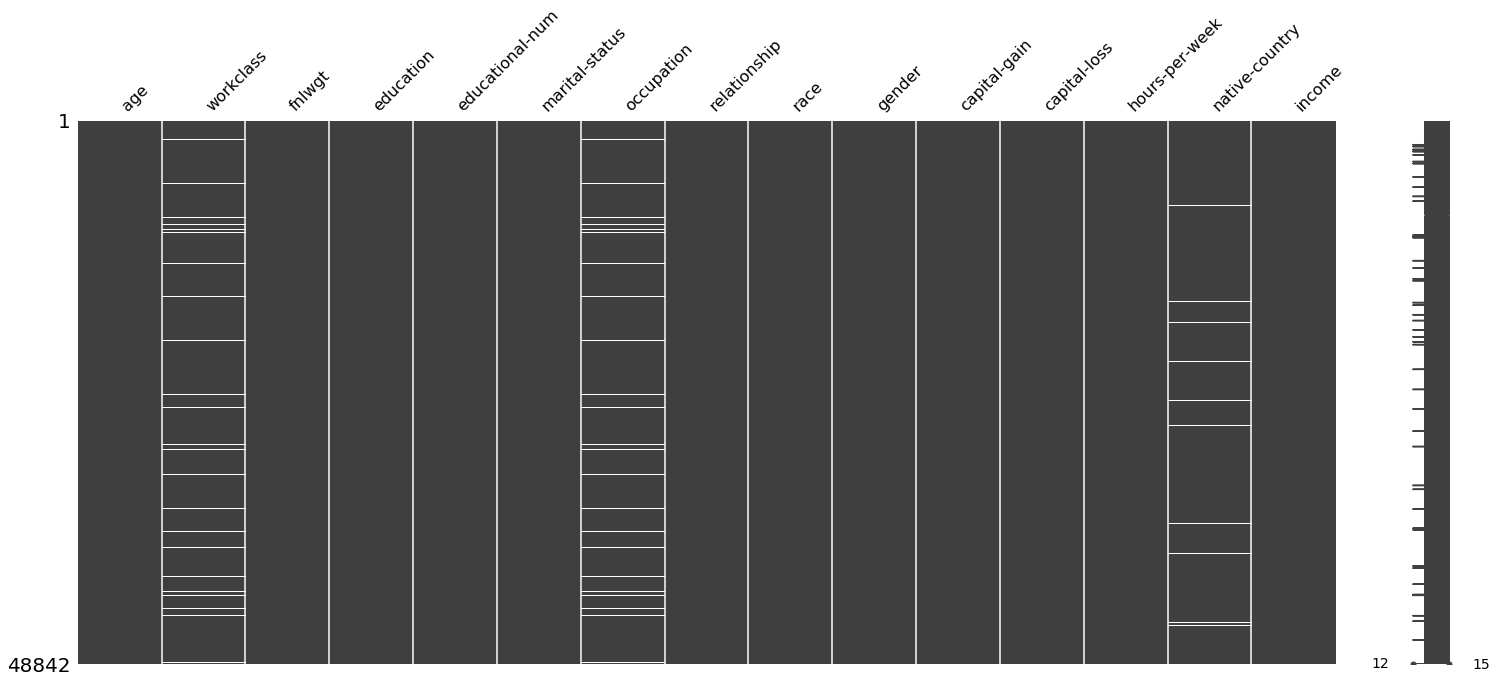

In [30]:
# Inspección de datos perdidos
df = df.replace(["?"], [np.nan])
for colname, serie in df.iteritems():
    if serie.isna().value_counts('%')[False] == 1.0:
        print(colname, 0.0)
    else:
        print(colname, serie.isna().value_counts('%')[True].round(3))
        
plt.figure(figsize=(4,4))
msngo.matrix(df)

In [63]:
# Preprocesamiento y recodificación de las variables
df['collars'] = np.nan
df['workclass_recod'] = np.nan
df['educ_recod'] = np.nan
df['civstatus'] = np.nan
df['region'] = np.nan

df['collars'] = np.where(
    np.in1d(
        df['occupation'], 
        ['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support']
    ), 'white-collar', df['collars'])

df['collars'] = np.where(
    np.in1d(
        df['occupation'], 
        ['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']
    ), 'blue-collar', df['collars'])

df['collars'] = np.where(
    np.in1d(
        df['occupation'], 
        ['Other-service', 'Armed-Forces']
    ), 'others', df['collars'])

df['workclass_recod'] = np.where(
    np.in1d(
        df['workclass'], 
        ['Federal-gov']
    ), 'federal-gov', df['workclass_recod'])

df['workclass_recod'] = np.where(
    np.in1d(
        df['workclass'], 
        ['State-gov', 'Local-gov']
    ), 'state-level-gov', df['workclass_recod'])

df['workclass_recod'] = np.where(
    np.in1d(
        df['workclass'], 
        ['Self-emp-inc', 'Self-emp-not-inc']
    ), 'self-employed', df['workclass_recod'])

df['workclass_recod'] = np.where(
    np.in1d(
        df['workclass'], 
        ['Never-worked', 'Without-pay']
    ), 'unemployed', df['workclass_recod'])

df['educ_recod'] = np.where(
    np.in1d(
        df['education'], 
        ['Preschool']
    ), 'preschool', df['educ_recod'])

df['educ_recod'] = np.where(
    np.in1d(
        df['education'], 
        ['1st-4th', '5th-6th']
    ), 'elementary-school', df['educ_recod'])

df['educ_recod'] = np.where(
    np.in1d(
        df['education'], 
        ['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad']
    ), 'high-school', df['educ_recod'])

df['educ_recod'] = np.where(
    np.in1d(
        df['education'], 
        ['Assoc-voc', 'Assoc-acdm', 'Some-college']
    ), 'college', df['educ_recod'])

df['educ_recod'] = np.where(
    np.in1d(
        df['education'], 
        ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    ), 'university', df['educ_recod'])

df['civstatus'] = np.where(
    np.in1d(
        df['marital-status'], 
        ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
    ), 'married', df['civstatus'])

df['civstatus'] = np.where(
    np.in1d(
        df['marital-status'], 
        ['Divorced']
    ), 'divorced', df['civstatus'])

df['civstatus'] = np.where(
    np.in1d(
        df['marital-status'], 
        ['Separated']
    ), 'separated', df['civstatus'])

df['civstatus'] = np.where(
    np.in1d(
        df['marital-status'], 
        ['Widowed']
    ), 'widowed', df['civstatus'])

df['region'] = np.where(
    np.in1d(
        df['native-country'], 
        ['Germany', 'England', 'Italy', 'France', 'Holand-Netherlands', 'Hungary', 'Scotland', 'Yugoslavia', 'Ireland', 'Greece', 'Portugal', 'Poland']
    ), 'europa', df['region'])

df['region'] = np.where(
    np.in1d(
        df['native-country'], 
        ['United-States', 'Mexico', 'Puerto-Rico', 'Canada', 'El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Columbia', 'Haiti', 'Nicaragua', 'Peru', 'Ecuador', 'Honduras', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)']
    ), 'america', df['region'])

df['region'] = np.where(
    np.in1d(
        df['native-country'], 
        ['Philippines', 'India', 'China', 'South', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Hong', 'Cambodia', 'Laos']
    ), 'asia', df['region'])

df['income_bin'] = np.where(df['income'] == '>50K', 1, 0)
